In [63]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

In [64]:
XYZ_Edges = pd.read_csv('data\Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
5,1,25,0.458187,Undirected
6,1,58,0.344212,Undirected
7,2,8,0.196901,Undirected
8,2,15,0.337786,Undirected
9,2,22,0.631476,Undirected


In [65]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

In [66]:
#歐幾里得距離-歐式距離
def Eudis(a,b):
    r = ( (a[0]-b[0])**2 + (a[1]-b[1])**2 + (a[2]-b[2])**2 )**0.5
    return r


In [67]:
Euclidean_Edges=np.empty(shape=[0, 3])
k=0
d=k+20
for ii in range(20): #分20批次計算
    print("第",ii+1,"批次")
    Euclidean_cal=np.empty(shape=[0, 3]) #用來暫存計算結果的空list
    for jj in range(k,d):  #從k點到d點計算
        p1=XYZ_C[jj]
        for kk in range(jj+1,2000):
            p2=XYZ_C[kk]
            source=jj#紀錄第i點到第j點距離
            Target=kk
            Weight=Eudis(p1,p2)    #call Eudis function
            pp=[source+1,Target+1,Weight]
            Euclidean_cal=np.vstack((Euclidean_cal,pp))
        Euclidean_calTemp=Euclidean_cal
    Euclidean_Edges=np.vstack((Euclidean_Edges,Euclidean_calTemp))
    k=k+20
    d=d+20
    
    #print(Euclidean_Edges)

第 1 批次
第 2 批次
第 3 批次
第 4 批次
第 5 批次
第 6 批次
第 7 批次
第 8 批次
第 9 批次
第 10 批次
第 11 批次
第 12 批次
第 13 批次
第 14 批次
第 15 批次
第 16 批次
第 17 批次
第 18 批次
第 19 批次
第 20 批次


In [68]:
Euclidean_Edges

array([[1.00000000e+00, 2.00000000e+00, 2.58049686e+01],
       [1.00000000e+00, 3.00000000e+00, 2.02098149e+01],
       [1.00000000e+00, 4.00000000e+00, 1.11322798e+01],
       ...,
       [4.00000000e+02, 1.99800000e+03, 9.95907727e+01],
       [4.00000000e+02, 1.99900000e+03, 9.83027245e+01],
       [4.00000000e+02, 2.00000000e+03, 9.74502396e+01]])

In [69]:
#Use the following command to install required package.
#conda install python-louvain networkx
#https://python-louvain.readthedocs.io/en/latest/index.html
#https://networkx.github.io/documentation/stable/index.html
import community
import networkx as nx
import matplotlib.pyplot as plt

#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0, len(Euclidean_Edges)):    
    e = ( str(int(Euclidean_Edges[i,0])), str(int(Euclidean_Edges[i,1])), Euclidean_Edges[i,2] )
    G.add_weighted_edges_from([(e)])    

In [70]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

community: 3.0
modularity: 0.029575592231942317


Community 0
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '15

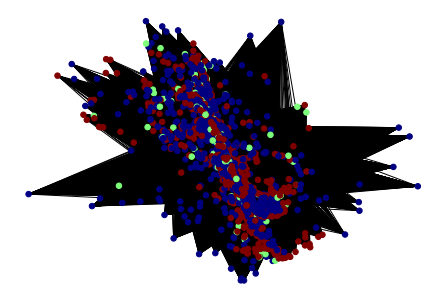

In [71]:
#assign node color based on community in network
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

In [72]:
#assign data point color based on community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))            

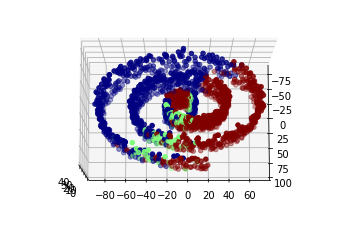

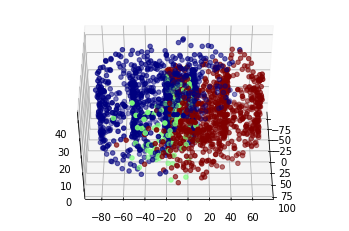

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)